In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import matplotlib as mpl
mpl.rcParams['axes.unicode_minus']=False
plt.rcParams['font.family']='NanumGothic'

from datetime import datetime

from IPython.display import display

#### 시계열 dataframe

In [2]:
today=datetime(2021,1,2)
display(today)

datetime.datetime(2021, 1, 2, 0, 0)

In [3]:
display(today.year)
display(today.month)
display(today.day)

2021

1

2

In [4]:
dates=[datetime(2021,1,1),datetime(2021,1,2)]
date_index=pd.DatetimeIndex(dates)
display(date_index)

DatetimeIndex(['2021-01-01', '2021-01-02'], dtype='datetime64[ns]', freq=None)

In [5]:
data=np.random.randn(2,2)
col=[1,2]

In [6]:
df=pd.DataFrame(index=date_index,data=data,columns=col)
display(df)

,1,2
2021-01-01,-0.936884,-0.371261
2021-01-02,-0.431825,-0.619673


In [7]:
df.index.min()

Timestamp('2021-01-01 00:00:00')

#### resampling

In [8]:
data=pd.read_csv('AAPL.csv')

In [9]:
data['Date']=data['Date'].apply(pd.to_datetime)

In [10]:
data.set_index('Date',inplace=True)

In [11]:
data['Month']=data.index.month

In [12]:
data.groupby('Month').agg(np.sum)

,Open,High,Low,Close,Adj Close,Volume
Month,,,,,,
1,3353.704999,3386.564999,3326.385008,3360.460005,3293.204261,8885437600
2,3082.665015,3125.605000,3053.002514,3090.527473,3036.333549,8621590800
3,3316.827521,3382.399998,3262.635004,3321.840016,3263.617533,11738908800
4,3367.577482,3407.335001,3333.790007,3374.367500,3315.332285,7955211200
5,3611.850013,3655.369991,3583.775005,3622.385011,3566.495856,8248136800
6,3849.082506,3891.995014,3813.649992,3857.042485,3805.871890,6068425800
7,4225.499994,4267.507492,4187.699990,4230.282499,4175.637729,6322058200
8,4807.110002,4865.457508,4757.369989,4817.302508,4764.234721,9596225100
9,4582.370011,4642.635003,4489.347500,4562.454970,4517.628961,8771923500


In [13]:
display(data.groupby(data.index.year).agg(np.sum))
display(data.groupby([data.index.year,data.index.month]).agg(np.sum))

,Open,High,Low,Close,Adj Close,Volume,Month
Date,,,,,,,
2018,11866.742525,11984.880008,11745.765018,11863.102531,11509.884031,34156144800,1633
2019,13095.752468,13219.397520,12995.112503,13120.124992,12930.374161,28254942800,1648
2020,24102.720048,24455.427491,23759.937453,24122.809947,24046.081079,38353076100,1656


Open         High          Low        Close    Adj Close  \
Date Date                                                                    
2018 1      913.612497   919.817506   907.295006   913.527498   879.100887   
     2      794.562501   806.967491   786.027506   796.285000   768.456867   
     3      918.997501   928.197503   908.572512   916.105009   885.175572   
     4      891.267502   901.202498   883.535002   891.630005   861.526902   
     5     1017.260010  1025.579997  1011.242502  1020.452497   988.446935   
     6      990.782507   996.617505   983.949998   990.262501   960.519018   
     7      998.529999  1005.585001   992.327492   999.135001   969.125040   
     8     1221.800004  1233.727495  1215.007500  1226.740009  1192.834304   
     9     1056.072502  1066.520004  1045.370002  1054.850007  1026.754934   
     10    1271.900006  1287.660008  1252.777497  1269.862498  1236.040738   
     11    1007.052499  1018.234995   990.677494  1003.987499   979.769595   
     12     784.904997   794.770005   768.982507   780.265007   762.133239   
2019 1      806.444994   816.535006   797.724998   809.372500   790.564319   
     2      814.112516   821.187506   810.025003   815.707492   799.271578   
     3      961.925005   970.892505   952.407498   962.292503   943.961952   
     4     1049.299989  1058.280000  1042.812492  1052.710005  1032.657134   
     5     1050.162498  1063.532493  1040.627503  1052.005000  1034.573693   
     6      963.322490   973.980003   956.165007   964.845000   950.110670   
     7     1127.784998  1137.012496  1121.527495  1128.690003  1111.453575   
     8     1128.942505  1141.852503  1115.672500  1127.267501  1113.143039   
     9     1088.637497  1097.355005  1079.697499  1089.974995  1077.407872   
     10    1350.844998  1362.572499  1339.435000  1352.897497  1337.298947   
     11    1308.469976  1317.307505  1301.210006  1312.602517  1300.601469   
     12    1445.805002  1458.889999  1437.807502  1451.759979  1439.329913   
2020 1     1633.647508  1650.212487  1621.365004  1637.560007  1623.539055   
     2     1473.989998  1497.450003  1456.950005  1478.534981  1468.605104   
     3     1435.905015  1483.309990  1401.654994  1443.442504  1434.480009   
     4     1427.009991  1447.852503  1407.442513  1430.027490  1421.148249   
     5     1544.427505  1566.257501  1531.905000  1549.927514  1543.475228   
     6     1894.977509  1921.397506  1873.534987  1901.934984  1895.242202   
     7     2099.184997  2124.909995  2073.845003  2102.457495  2095.059114   
     8     2456.367493  2489.877510  2426.689989  2463.294998  2458.257378   
     9     2437.660012  2478.759994  2364.279999  2417.629968  2413.466155   
     10    2567.269990  2602.040016  2528.049988  2561.090012  2556.679109   
     11    2334.970016  2363.979973  2308.209999  2336.519987  2335.739469   
     12    2797.310014  2829.380013  2766.009972  2800.390007  2800.390007   

               Volume  Month  
Date Date                     
2018 1     2638717600     21  
     2     3711577200     38  
     3     2854910800     63  
     4     2664617200     84  
     5     2483905200    110  
     6     2110498000    126  
     7     1574765600    147  
     8     2801275600    184  
     9     2715888000    171  
     10    3158994000    230  
     11    3845305600    231  
     12    3595690000    228  
2019 1     3312349600     21  
     2     1890162400     38  
     3     2603925600     63  
     4     2024470800     84  
     5     2957826400    110  
     6     2060874800    120  
     7     1895406800    154  
     8     2724326400    176  
     9     2170268400    180  
     10    2433210800    230  
     11    1793326000    220  
     12    2388794800    252  
2020 1     2934370400     21  
     2     3019851200     38  
     3     6280072400     66  
     4     3266123200     84  
     5     2806405200    100  
     6     1897053000    132  
     7     2851885800    154  
     8     4070623100    168  

In [14]:
data.resample(rule='A').sum().loc['2018']

,Open,High,Low,Close,Adj Close,Volume,Month
Date,,,,,,,
2018-12-31,11866.742525,11984.880008,11745.765018,11863.102531,11509.884031,34156144800,1633


In [15]:
def first_day(sample):
    return sample[0]

# 매년 마지막 첫번째 가격
data.resample(rule='A').apply(first_day)

,Open,High,Low,Close,Adj Close,Volume,Month
Date,,,,,,,
2018-12-31,42.540001,43.075001,42.314999,43.064999,41.442081,102223600,1
2019-12-31,38.722500,39.712502,38.557499,39.480000,38.562561,148158800,1
2020-12-31,74.059998,75.150002,73.797501,75.087502,74.444603,135480400,1


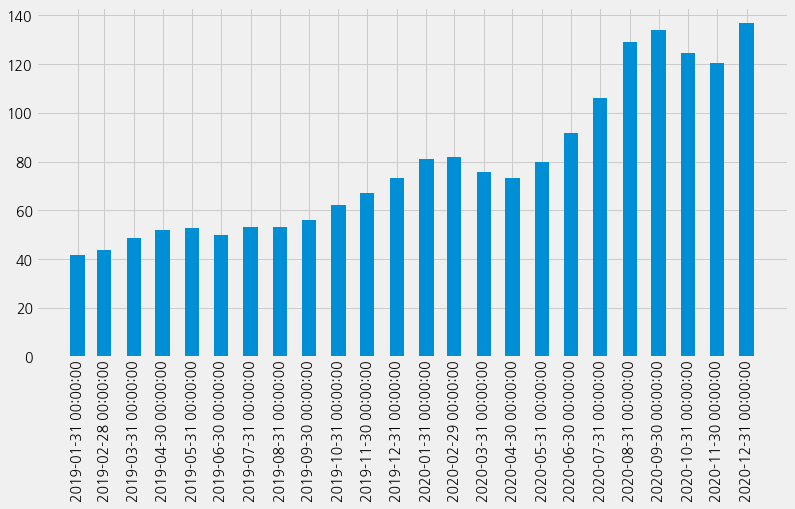

In [16]:
Close_2019_2020=data.Close.resample(rule='M').max().loc['2019':]

fig,ax=plt.subplots(1,1,figsize=(12,6))

ax.bar(x=Close_2019_2020.index,height=Close_2019_2020,width=15)

ax.set_xticks(Close_2019_2020.index)
ax.set_xticklabels(Close_2019_2020.index,rotation=90)
plt.show()

In [17]:
daily_dates=pd.date_range(start=datetime(2020,1,1),
                          end=datetime(2021,1,1),
                          freq='B')

data=np.random.rand(263)
df=pd.DataFrame(data=data,index=daily_dates,columns=['values'])
display(df)

,values
2020-01-01,0.067651
2020-01-02,0.180422
2020-01-03,0.494810
2020-01-06,0.524699
2020-01-07,0.651741
...,...
2020-12-28,0.194493
2020-12-29,0.866790
2020-12-30,0.379622
2020-12-31,0.826485


In [18]:
# df.resample('W-TUE').mean() 
df.resample('M').min()

,values
2020-01-31,0.005506
2020-02-29,0.052285
2020-03-31,0.016358
2020-04-30,0.110190
2020-05-31,0.001611
2020-06-30,0.009463
2020-07-31,0.002121
2020-08-31,0.015883
2020-09-30,0.129003
2020-10-31,0.032859


#### shift

In [19]:
display(df.shift(1).tail())  # 아래로
display(df.shift(-1).head()) # 위로

,values
2020-12-28,0.498804
2020-12-29,0.194493
2020-12-30,0.866790
2020-12-31,0.379622
2021-01-01,0.826485


,values
2020-01-01,0.180422
2020-01-02,0.494810
2020-01-03,0.524699
2020-01-06,0.651741
2020-01-07,0.532443


#### rolling and expanding

In [20]:
data=pd.read_csv('AAPL.csv',index_col='Date',parse_dates=['Date'])
display(data.head())

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,42.540001,43.075001,42.314999,43.064999,41.442081,102223600
2018-01-03,43.132500,43.637501,42.990002,43.057499,41.434864,118071600
2018-01-04,43.134998,43.367500,43.020000,43.257500,41.627323,89738400
2018-01-05,43.360001,43.842499,43.262501,43.750000,42.101261,94640000
2018-01-08,43.587502,43.902500,43.482498,43.587502,41.944889,82271200


In [21]:
data.rolling(7).mean()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-05,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-08,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2020-12-24,129.340002,130.808572,127.957141,129.458573,129.458573,1.169172e+08
2020-12-28,130.280002,132.090001,128.949998,130.727145,130.727145,1.206711e+08
2020-12-29,131.587146,133.405714,129.849999,131.608573,131.608573,1.244836e+08


In [22]:
data.expanding(min_periods=1).mean()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,42.540001,43.075001,42.314999,43.064999,41.442081,1.022236e+08
2018-01-03,42.836250,43.356251,42.652501,43.061249,41.438473,1.101476e+08
2018-01-04,42.935833,43.360001,42.775000,43.126666,41.501423,1.033445e+08
2018-01-05,43.041875,43.480625,42.896876,43.282500,41.651382,1.011684e+08
2018-01-08,43.151000,43.565000,43.014000,43.343500,41.710084,9.738896e+07
...,...,...,...,...,...,...
2020-12-24,64.525951,65.309634,63.787028,64.585196,63.761129,1.334085e+08
2020-12-28,64.618201,65.405292,63.879621,64.680953,63.857980,1.333966e+08
2020-12-29,64.715590,65.502619,63.973070,64.774042,63.952161,1.333803e+08


#### 볼린저 밴드

1. df.Close 20일 이동평균선의 std를 2 와 -2 씩 곱한것

<AxesSubplot:xlabel='Date'>

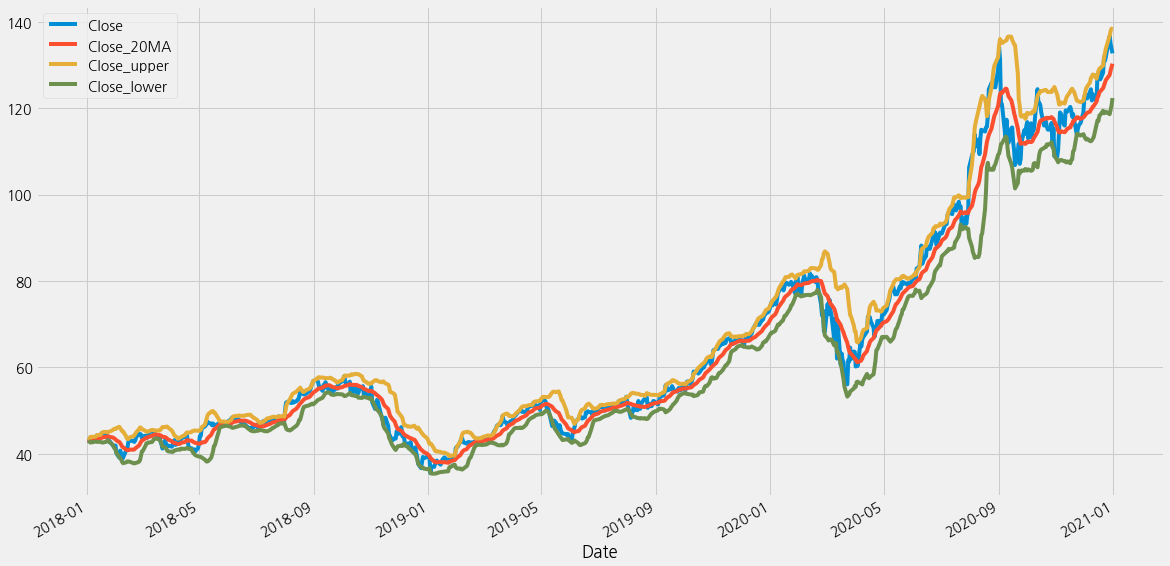

In [23]:
data['Close_20MA']=data['Close'].rolling('20D').mean()
data['Close_upper']=data['Close_20MA']+2*data['Close'].rolling('20D').std()
data['Close_lower']=data['Close_20MA']-2*data['Close'].rolling('20D').std()

data[['Close','Close_20MA','Close_upper','Close_lower']].plot(figsize=(18,10))

#### TImezone

In [24]:
import pytz

In [25]:
KST=pytz.timezone('Asia/Seoul')
display(datetime(2021,1,1,tzinfo=KST))  # 이상
display(KST.localize(datetime(2021,1,1))) # 정상 

my_tz=KST.localize(datetime(2021,1,1))

my_tz.strftime('%Y-%m-%d')

datetime.datetime(2021, 1, 1, 0, 0, tzinfo=<DstTzInfo 'Asia/Seoul' LMT+8:28:00 STD>)

datetime.datetime(2021, 1, 1, 0, 0, tzinfo=<DstTzInfo 'Asia/Seoul' KST+9:00:00 STD>)

'2021-01-01'

In [26]:
# 일년이 안바뀔때
# 다시해보기

def last_Fri():
    today=KST.localize(datetime(2020,12,25))
    if today.weekday()>4:
        offset=-(today.weekday()-4)
        now=True
    else:
        offset=4-today.weekday()
        now=False
    display(offset)
    if not offset:
        last_fri=datetime(today.year,today.month,today.day)
        return last_fri
    if now:
        last_fri=today.replace(day=today.day+offset)
        return last_fri
    aweekago=today.replace(day=today.day-7)
    last_fri=aweekago.replace(day=aweekago.day+offset)
    return last_fri

In [27]:
# timedelta
from datetime import timedelta

In [28]:
datetime.today().weekday()

6

In [29]:
# 상관없이 다 가능.
# 다시해보기.
def last_Thu():
    today=KST.localize(datetime.today())
    if today.weekday()>3:
        offset=today.weekday()-3
        print(offset)
        now=True
    else:
        offset=3-today.weekday()%3
        now=False
    if now:
        last_thu=today+timedelta(days=-offset)
        print()
        return last_thu
    aweekago=today+timedelta(weeks=-1)
    last_thu=aweekago+timedelta(days=offset)  
    return last_thu

In [30]:
last_Thu()

3



datetime.datetime(2020, 12, 31, 8, 20, 7, 441538, tzinfo=<DstTzInfo 'Asia/Seoul' KST+9:00:00 STD>)

<AxesSubplot:xlabel='Date'>

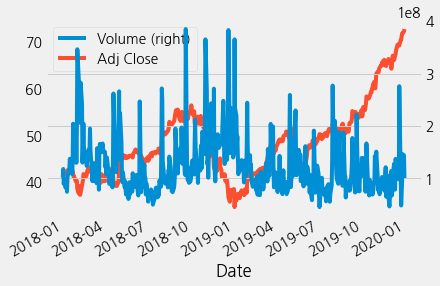

In [31]:
df=data[['Volume','Adj Close']]
df.loc['2018':'2019'].plot(secondary_y=['Volume'])

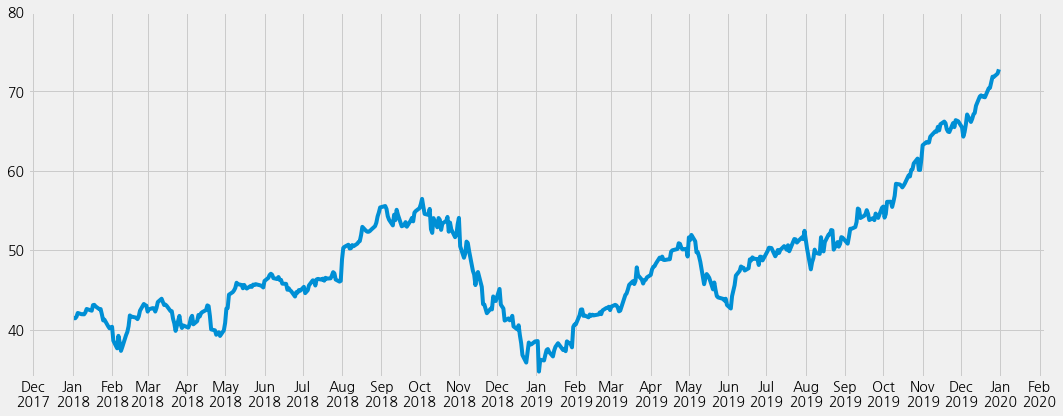

In [32]:
import matplotlib.dates as mdate

index=df['2018':'2019'].index
stock=df['2018':'2019']['Adj Close']

fig,ax=plt.subplots(1,1,figsize=(15,6))

ax.plot(index,stock,'-')
ax.xaxis.set_major_locator(mdate.MonthLocator())
ax.xaxis.set_major_formatter(mdate.DateFormatter('%b\n%Y'))

ax.set_ylim((34,80))

plt.tight_layout()
plt.show()

### 시계열의 특성

trends 올라가는 정체된 하향하는 - 경향성  
seasonality 반복되는 트렌드 - 연별, 월별 등. 반복되는 패턴이 최소3번이상보이면(기준은 아니다.)   
어떤 구간에 대해서 seasonality를 부여해서 분석하기도 한다.   
cyclical long-term 동안 일정하지않는 trend   

패턴들을 가지고 모델링을 한다.  
노이즈 안에서 패턴을 파악한다. 

#### ETS  error,trend,seasonality

In [33]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [34]:
series=pd.Series([i+np.random.randint(10) for i in range(1,100)])

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
     ... 
94    0.0
95    0.0
96    0.0
97    0.0
98    0.0
Name: resid, Length: 99, dtype: float64

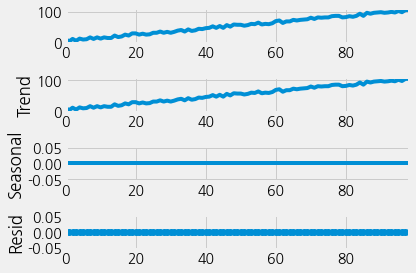

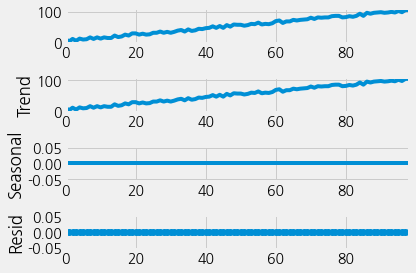

In [35]:
result=seasonal_decompose(series,model='additive',period=1)

display(result.resid)
result.plot()

In [36]:
def plot_decompose(decompose_result):
    fig,axs=plt.subplots(4,1,figsize=(15,8))
    decompose_result.observed.plot(legend=False,ax=axs[0])
    axs[0].set_ylabel('Observed')
    decompose_result.trend.plot(legend=False,ax=axs[1])
    axs[1].set_ylabel('Trend')
    decompose_result.seasonal.plot(legend=False,ax=axs[2])
    axs[2].set_ylabel('Seasonal')
    decompose_result.resid.plot(legend=False,ax=axs[3])
    axs[3].set_ylabel('Resid')

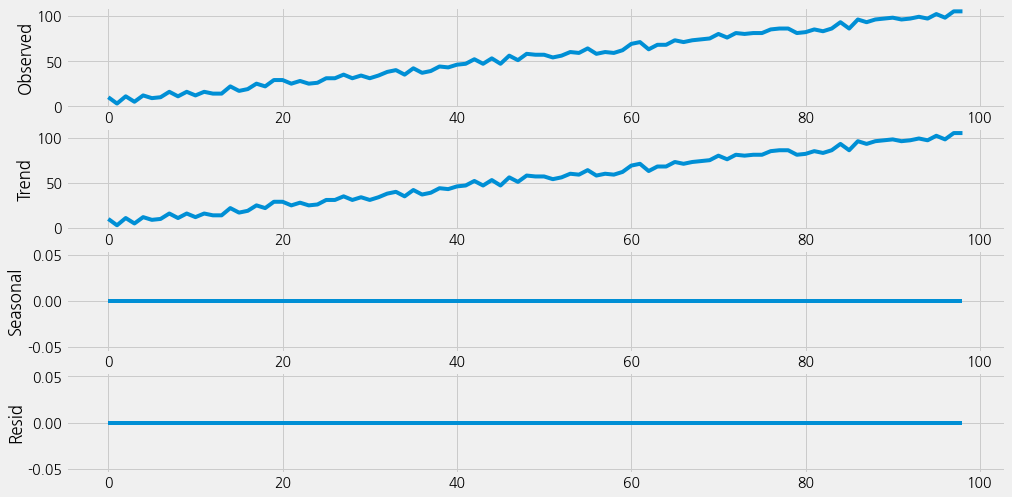

In [37]:
plot_decompose(result)

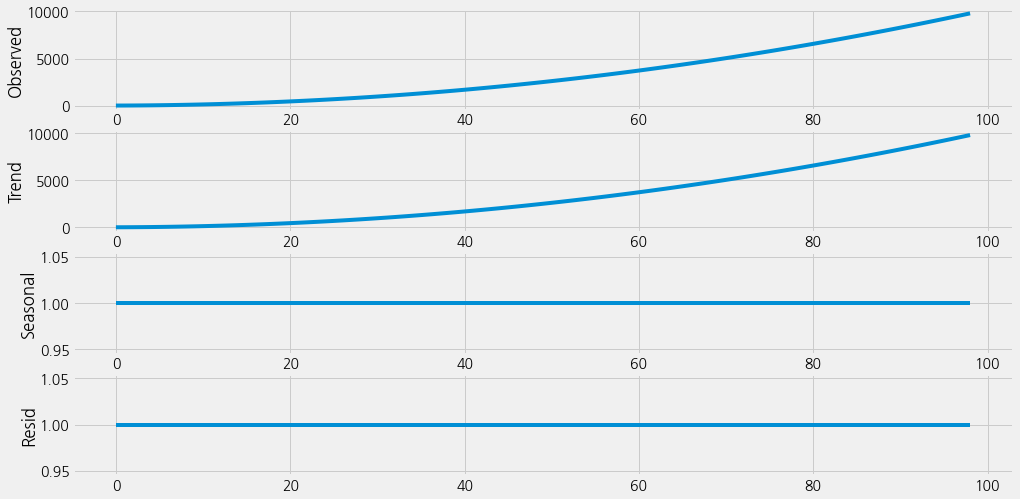

In [38]:
series=pd.Series([i**2 for i in range(1,100)])
result=seasonal_decompose(series,model='multiplicative',period=1)

plot_decompose(result)

In [39]:
data=pd.read_csv('https://github.com/jbrownlee/Datasets/raw/master/airline-passengers.csv',index_col='Month')

<AxesSubplot:xlabel='Month'>

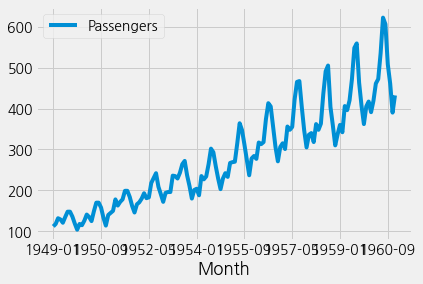

In [40]:
data.plot()

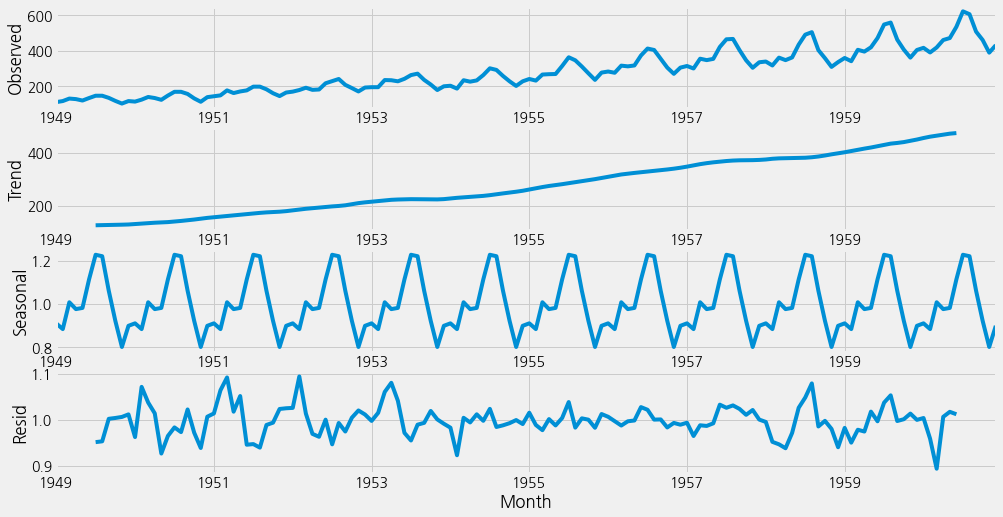

In [41]:
data.index=pd.to_datetime(data.index)

result=seasonal_decompose(data['Passengers'],model='multiplicative')
plot_decompose(result)

### SMA,WMA,SES 모델

In [42]:
data=pd.read_csv('https://github.com/jbrownlee/Datasets/raw/master/airline-passengers.csv',index_col='Month',parse_dates=True)

In [43]:
data['Passengers'].head()

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: Passengers, dtype: int64

In [44]:
data['Passengers'].rolling(window=3).mean().head(50)

Month
1949-01-01           NaN
1949-02-01           NaN
1949-03-01    120.666667
1949-04-01    126.333333
1949-05-01    127.333333
1949-06-01    128.333333
1949-07-01    134.666667
1949-08-01    143.666667
1949-09-01    144.000000
1949-10-01    134.333333
1949-11-01    119.666667
1949-12-01    113.666667
1950-01-01    112.333333
1950-02-01    119.666667
1950-03-01    127.333333
1950-04-01    134.000000
1950-05-01    133.666667
1950-06-01    136.333333
1950-07-01    148.000000
1950-08-01    163.000000
1950-09-01    166.000000
1950-10-01    153.666667
1950-11-01    135.000000
1950-12-01    129.000000
1951-01-01    133.000000
1951-02-01    145.000000
1951-03-01    157.666667
1951-04-01    163.666667
1951-05-01    171.000000
1951-06-01    171.000000
1951-07-01    183.000000
1951-08-01    192.000000
1951-09-01    194.000000
1951-10-01    181.666667
1951-11-01    164.000000
1951-12-01    158.000000
1952-01-01    161.000000
1952-02-01    172.333333
1952-03-01    181.333333
1952-04-01    184.6

In [45]:
data['6MA_ps']=data['Passengers'].rolling(window=6).mean()
data['12MA_ps']=data['Passengers'].rolling(window=12).mean()

display(data)

,Passengers,6MA_ps,12MA_ps
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,NaN,NaN
1949-03-01,132,NaN,NaN
1949-04-01,129,NaN,NaN
1949-05-01,121,NaN,NaN
...,...,...,...
1960-08-01,606,519.166667,463.333333
1960-09-01,508,534.000000,467.083333
1960-10-01,461,534.000000,471.583333


<AxesSubplot:xlabel='Month'>

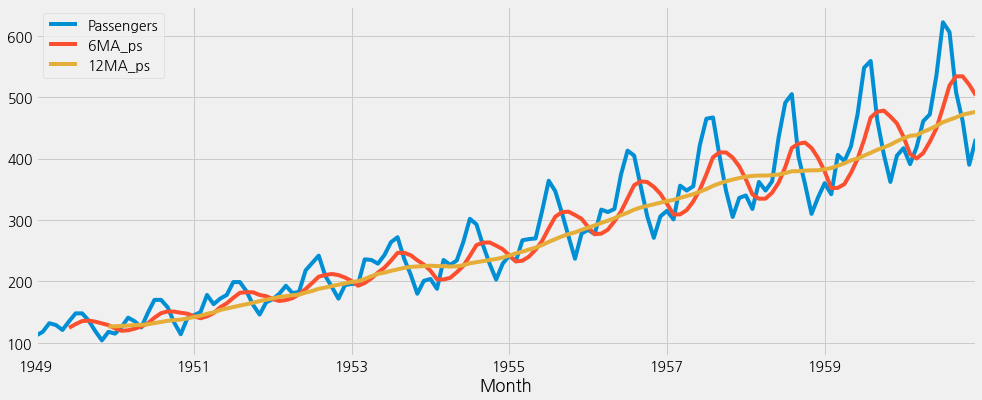

In [46]:
data.plot(figsize=(15,6))

### weighted moving average

In [47]:
data=pd.read_csv('https://github.com/jbrownlee/Datasets/raw/master/airline-passengers.csv',index_col='Month',parse_dates=True)

<AxesSubplot:xlabel='Month'>

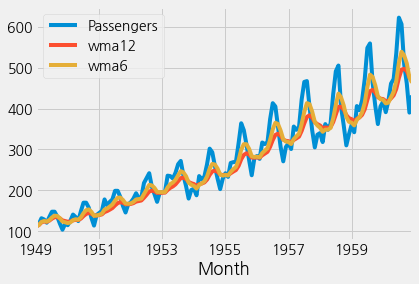

In [49]:
data['wma12']=data['Passengers'].ewm(span=12).mean()
data['wma6']=data['Passengers'].ewm(span=6).mean()

data[['Passengers','wma12','wma6']].plot()

### simple exponential smoothing, holt's , holt-winter's

In [50]:
# 생략.
from statsmodels.tsa.api import SimpleExpSmoothing 

<AxesSubplot:xlabel='Month'>

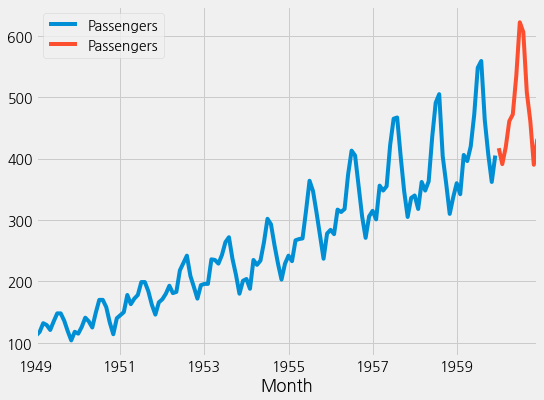

In [52]:
train=data[:'1959'][['Passengers']]
test=data['1960':][['Passengers']]

fig,ax=plt.subplots(1,1,figsize=(8,6))
train.plot(ax=ax)
test.plot(ax=ax)

/opt/conda/envs/ts/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


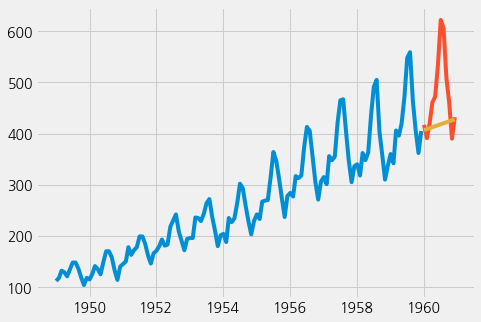

In [53]:
# holt seasonality를 반영 못했고, trend 정도는 반영했다. 
# 경향성 feature로 사용하면 괜찮을 것 같다.
from statsmodels.tsa.api import Holt

holt_model=Holt(np.asarray(train['Passengers']))
holt_result=holt_model.fit()
test['holt_y']=holt_result.forecast(len(test))

fig,ax=plt.subplots(1,1,figsize=(7,5))
ax.plot(train['Passengers'])
ax.plot(test['Passengers'])
ax.plot(test['holt_y'])

plt.show()

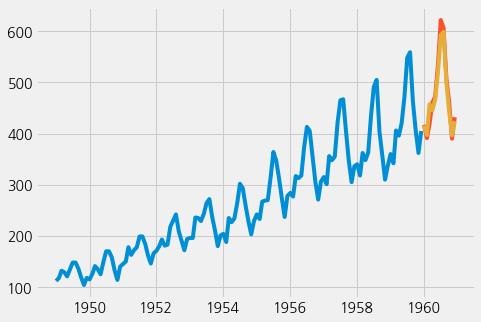

In [54]:
# holt winter
from statsmodels.tsa.api import ExponentialSmoothing as winter

winter_model=winter(np.asarray(train['Passengers']),seasonal_periods=12,
                    trend='add',seasonal='add')

winter_result=winter_model.fit()
test['winter_y']=winter_result.forecast(len(test))

fig,ax=plt.subplots(1,1,figsize=(7,5))
ax.plot(train['Passengers'])
ax.plot(test['Passengers'])
ax.plot(test['winter_y'])

plt.show()

### ARIMA

In [56]:
import statsmodels.api as sm

In [57]:
arima=sm.tsa.statespace.SARIMAX(train['Passengers'],
                                order=(2,1,1),
                                seasonal_order=(0,1,0,12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

/opt/conda/envs/ts/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/envs/ts/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


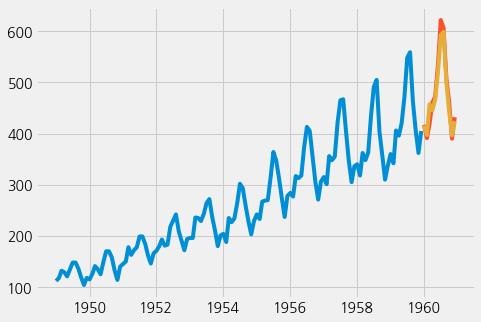

In [58]:
arima_result=arima.fit()

test['arima']=arima_result.predict(start='1960-01-01',
                                   end='1960-12-01',dynamic=True) # 예측된 인자를 사용해서 다음꺼가지 사용.

fig,ax=plt.subplots(1,1,figsize=(7,5))
ax.plot(train['Passengers'])
ax.plot(test['Passengers'])
ax.plot(test['winter_y'])

plt.show()

#### stationary vs non-stationary

연속된 숫자들의 평균,분산,공분산이 시간에 따라 변화가 없으면 stationary하다고 한다.    

arima는 stationary 일때 효과적이다.  
 
만약 non-stationary 하다면 differencing 을 하면 stationary하게 하면 된다.    

p,d,q 모수 중 d가 결정 된다.    

test는 dickey-fuller test를 통해 알아본다.  

ACF는 lag했을 때 시점과 비교시점까지 모든 영향을 비교하고 그리는 것이고,  
PACF는 lag했을 때 시점과 비교시점 딱 둘만 비교하는것이다.  

이 둘의 특성을 보고, p와 q를 구한다. 

ACF과 0 으로 가고 PACF가 컷오프되는 순간을 p 로 한다.   
반대로 ACF가 컷오프 되고, PACF가 0으로 간다면 그 컷오프 된 순간을 q로 한다.  

그래도 믿지말고, try-error를 많이 사용한다.

In [63]:
milk=pd.read_csv('https://github.com/plotly/datasets/raw/master/monthly-milk-production-pounds.csv',
                 index_col='Month',parse_dates=True)
milk.head()

,Monthly milk production (pounds per cow)
Month,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


In [64]:
milk.columns=['production_milk']

<AxesSubplot:xlabel='Month'>

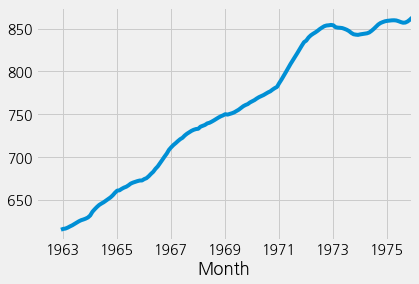

In [66]:
# 경향

milk['production_milk'].rolling(12).mean().plot()

<AxesSubplot:xlabel='Month'>

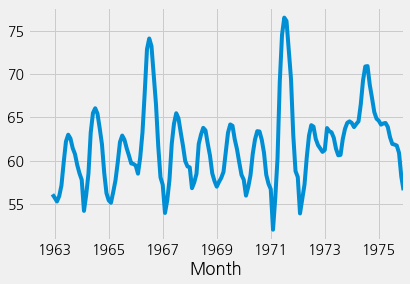

In [67]:
# 분산 좀 튀는 경향이 있다.
milk['production_milk'].rolling(12).std().plot()

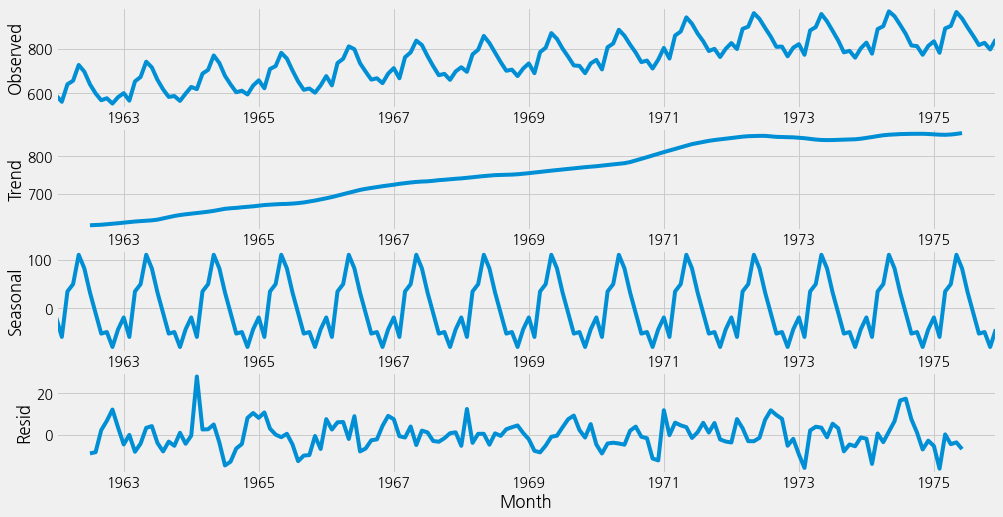

In [68]:
from statsmodels.tsa.seasonal import seasonal_decompose

result=seasonal_decompose(milk['production_milk'],model='additive',period=12)
plot_decompose(result)

In [72]:
from statsmodels.tsa.stattools import adfuller

result=adfuller(milk['production_milk'])

def check_adf(result):
    if result[1]>=0.05:
        print(f"non-stationary \np-value : {result[1]}")
    else:
        print("stationary")
check_adf(result)

non-stationary 
p-value : 0.6274267086030337


In [74]:
# 차분할수록 stationary 해지긴함.
milk['diff_1']=milk['production_milk']-milk['production_milk'].shift(1)

result=adfuller(milk['diff_1'].dropna())

check_adf(result)

stationary


In [75]:
milk['season_diff']=milk['production_milk']-milk['production_milk'].shift(12)
result=adfuller(milk['season_diff'].dropna())
check_adf(result)

non-stationary 
p-value : 0.16079880527711382


stationary


None

<AxesSubplot:xlabel='Month'>

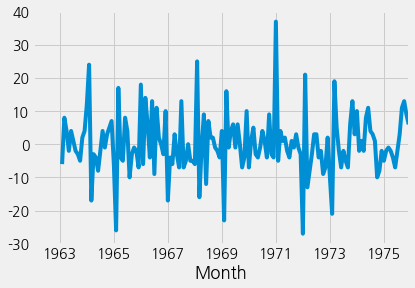

In [78]:
milk['season_diff_1']=milk['diff_1']-milk['diff_1'].shift(12)

result=adfuller(milk['season_diff_1'].dropna())
display(check_adf(result))

milk['season_diff_1'].plot()

# 즉, differencing 은 1이다. 

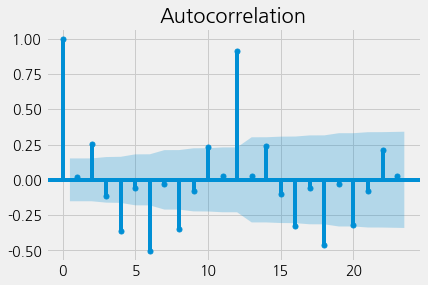

In [92]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

plot_acf(milk['diff_1'].dropna());

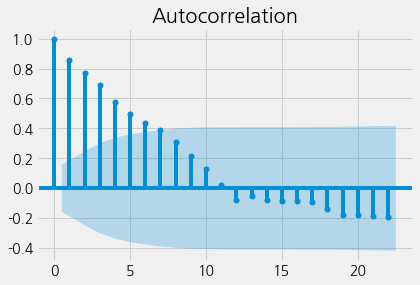

In [93]:
plot_acf(milk['season_diff'].dropna());

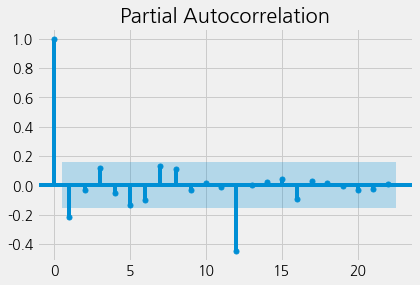

In [95]:
# pacf에서 음수가 나온다. 앞에?
# p 하나 늘려주면 된다.

# pacf 로 p 값을.
# acf 로 q 값을 올려주면 된다. 
plot_pacf(milk['season_diff_1'].dropna(),method='ywm');

/opt/conda/envs/ts/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/envs/ts/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


<AxesSubplot:ylabel='Density'>

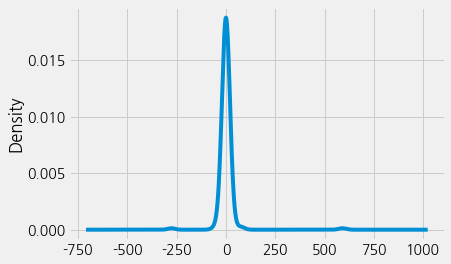

In [96]:
# 앞에 correlation이 없어지다가 뒤에 생긴다 말이 안되다.
# 위와 같이 잘 못정하는 경우 
# d=1 만 해놓고, p,q를 0부터 해본다. 

model=sm.tsa.statespace.SARIMAX(milk['production_milk'],
                                order=(0,1,0),
                                seasonal_order=(1,1,1,12))

result=model.fit()
result.resid.plot(kind='kde') # 0을 기준으로 가우시안분포를보이면 어느정도 비편향 노이즈인것을 알 수있다.

In [97]:
# 중요한것은 AIC,BIC 모델의 단순함정도. 
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                      production_milk   No. Observations:                  168
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -534.065
Date:                              Sun, 03 Jan 2021   AIC                           1074.131
Time:                                      09:25:54   BIC                           1083.261
Sample:                                  01-01-1962   HQIC                          1077.839
                                       - 12-01-1975                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.0449      0.106     -0.422      0.673      -0.253       0.163
ma.S.L12      -0.5860      0.102     -5.762      0.000      -0.785      -0.387
sigma2        55.5118      5.356     10.365      0.000      45.015      66.009
===================================================================================
Ljung-Box (L1) (Q):                   8.13   Jarque-Bera (JB):                32.04
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.69   Skew:                             0.77
Prob(H) (two-sided):                  0.18   Kurtosis:                         4.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='Month'>

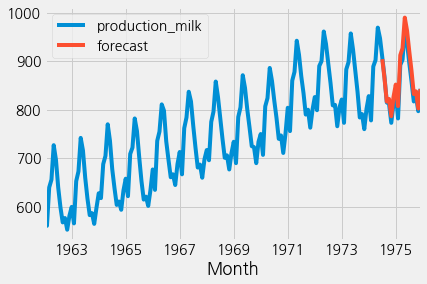

In [98]:
# 항상 중요한것은 arima는 한템포 범위 안에것으로 예측한다.

milk['forecast']=result.predict(start=150,end=168,dynamic=True)

milk[['production_milk','forecast']].plot()

### rolling forecast

In [104]:
def dateparser(x):
    return datetime.strptime('190'+x,'%Y-%m')

In [105]:
hair=pd.read_csv('https://github.com/andersy005/deep-learning/raw/master/keras/Recurrent_Neural_Nets/datasets/sales-of-shampoo-over-a-three-ye.csv',
                 index_col='Month',parse_dates=True,date_parser=dateparser)
hair.head()

,Sales of shampoo over a three year period
Month,
1901-01-01,266.0
1901-02-01,145.9
1901-03-01,183.1
1901-04-01,119.3
1901-05-01,180.3


In [106]:
hair.columns=['sales']

<AxesSubplot:xlabel='Month'>

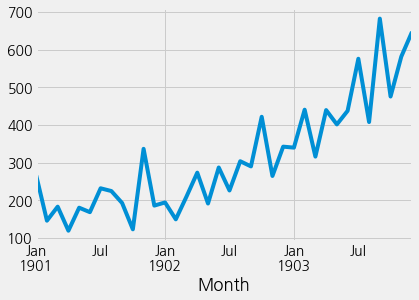

In [111]:
hair.sales.plot()

In [115]:
check_adf(adfuller(hair['sales']))

non-stationary 
p-value : 1.0


In [116]:
hair['diff_1']=hair['sales']-hair['sales'].shift(1)

check_adf(adfuller(hair['diff_1'].dropna()))

stationary


In [119]:
from statsmodels.tsa.arima_model import ARIMA
from itertools import product

p,d,q=list(range(4)),[1,2],[0]
pdq=list(product(p,d,q))
display(pdq)

[(0, 1, 0),
 (0, 2, 0),
 (1, 1, 0),
 (1, 2, 0),
 (2, 1, 0),
 (2, 2, 0),
 (3, 1, 0),
 (3, 2, 0)]

In [120]:
for params in pdq:
    model=ARIMA(hair['sales'],order=params)
    result=model.fit()
    print(f"ARIMA ({params}) , AIC : {result.aic}")

/opt/conda/envs/ts/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/opt/conda/envs/ts/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequen

ARIMA ((0, 1, 0)) , AIC : 430.87311187552797
ARIMA ((0, 2, 0)) , AIC : 461.1578257086931
ARIMA ((1, 1, 0)) , AIC : 406.0222895923647
ARIMA ((1, 2, 0)) , AIC : 423.9000860377768
ARIMA ((2, 1, 0)) , AIC : 403.6275641166002


/opt/conda/envs/ts/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/envs/ts/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/envs/ts/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/envs/ts/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA ((2, 2, 0)) , AIC : 412.9993824970412
ARIMA ((3, 1, 0)) , AIC : 404.69245918163585


/opt/conda/envs/ts/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/envs/ts/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/envs/ts/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/envs/ts/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA ((3, 2, 0)) , AIC : 410.91092658459803


In [133]:
p,d,q=3,1,0

X=hair['sales'].values
train,test=X[:24],X[24:]
history=[x for x in train]
prediction=[]

In [136]:
for t in range(12):
    model=ARIMA(history,order=(3,1,0))
    result=model.fit(disp=0)
    output=result.forecast()
    yhat=output[0]
    prediction.append(yhat)
    history.append(test[t])

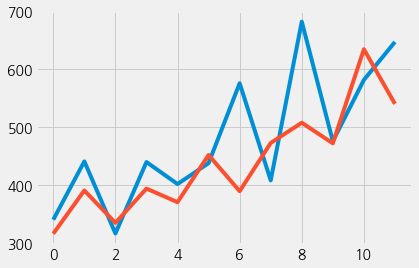

In [141]:
plt.plot(test)
plt.plot(prediction)